<a href="https://colab.research.google.com/github/seyong2/kaggle-spaceship-titanic/blob/main/Spaceship_Titanic_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook, we will be exploring the *Spaceship Titanic* dataset before building a model to **predict whether a passenger was transported to an alternate dimension during the Spaceship Titanic's collision with the spacetime anomaly**.

The dataset can be found [here](https://www.kaggle.com/competitions/spaceship-titanic/data).

# 0. Import Python packages

In [1]:
# Data manipulation
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from sklearn.impute import KNNImputer

# 1. Load Data

Let's load the training data in folder *data* and start exploring.

In [2]:
# Install the Kaggle library
! pip install kaggle

# Make a directory named ".kaggle"
! mkdir ~/.kaggle

# Copy the "kaggle.json" into this new directory
! cp kaggle.json ~/.kaggle/

# Allocate the required permission for this file
! chmod 600 ~/.kaggle/kaggle.json

! kaggle competitions download spaceship-titanic

! unzip spaceship-titanic.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  0% 0.00/299k [00:00<?, ?B/s]
100% 299k/299k [00:00<00:00, 61.0MB/s]
Archive:  spaceship-titanic.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [3]:
# import train and test set
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [4]:
print(f"The training dataset has {train_df.shape[0]} rows and {train_df.shape[1]} columns.")
print(f"The testing dataset has {test_df.shape[0]} rows and {test_df.shape[1]} columns.")

The training dataset has 8693 rows and 14 columns.
The testing dataset has 4277 rows and 13 columns.


The test data set has one less column than the training set because there is no target variable.

In [5]:
print(f"The first five rows of the training dataset:\n")
train_df.head()

The first five rows of the training dataset:



,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [6]:
print(f"The first five rows of the test dataset:\n")
test_df.head()

The first five rows of the test dataset:



,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [7]:
print(f"The last five rows of the training dataset:\n")
train_df.tail()

The last five rows of the training dataset:



,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False
8692,9280_02,Europa,False,E/608/S,TRAPPIST-1e,44.0,False,126.0,4688.0,0.0,0.0,12.0,Propsh Hontichre,True


In [8]:
print(f"The last five rows of the test dataset:\n")
test_df.tail()

The last five rows of the test dataset:



,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale
4276,9277_01,Earth,True,G/1498/S,PSO J318.5-22,43.0,False,0.0,0.0,0.0,0.0,0.0,Lilace Leonzaley


**Data description**

* `PassengerId`: A unique Id for each passenger. Each Id takes the form `gggg_pp` where `gggg` indicates a group the passenger is travelling with and `pp` is their number within the group. People in a group are often family members, but not always.
* `HomePlanet`: The planet the passenger departed from, typically their planet of permanent residence.
* `CryoSleep`: Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
* `Cabin`: The cabin number where the passenger is staying. Takes the form `deck/num/side`, where `side` can be either `P` for Port or `S` for Starboard.
* `Destination`: The planet the passenger will be debarking to.
* `Age`: The age of the passenger.
* `VIP`: Whether the passenger has paid for special VIP service during the voyage.
* `RoomService`, `FoodCourt`, `ShoppingMall`, `Spa`, `VRDeck`: Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
* `Name` - The first and last names of the passenger.
* `Transported` - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

Below a concise summary of the training data is given.

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


Based on the summary, the features are one of three types; continuous, categorical, and ambiguous.

* Continuous: `Age`, `RoomService`, `FoodCourt`, `ShoppingMall`, `Spa`, and `VRDeck`.
* Categorical: `HomePlanet`, `CryoSleep`, `Destination`, `VIP`, and `Transported`.
* Ambiguous: `PassengerId`, `Cabin`, and `Name`.

# 2. Data Exploration - Univariate

Now the columns are broken down into three separate buckets, let's examine each one individually.

## 2.1 Continuous features

In [10]:
num_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

uni_stats = train_df.describe()
uni_stats.loc['skew'] = train_df.loc[:, num_cols].skew().tolist()
uni_stats.loc['kurt'] = train_df.loc[:, num_cols].kurtosis().tolist()

uni_stats

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000
skew,0.419097,6.333014,7.102228,12.627562,7.636020,7.819732
kurt,0.101933,65.273802,73.307230,328.870913,81.202110,86.011186


According to descriptive statistics of the continuous features...
* no obvious inconsistencies are captured,
* all the continuous features except `Age` are very right-skewed,
* `Age` feature has fat tails whereas the remaining features have very thin tails,
* all of them contain missing observations, and
* the average age of passengers is about 29 years old, and the 0-year-old to 79-year-old also boarded the *Spaceship Titanic*.


Let's have a look at how they are distributed.

<Figure size 864x432 with 0 Axes>

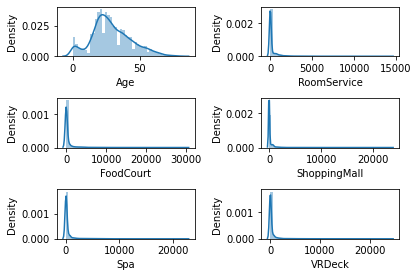

In [11]:
fig = plt.figure(figsize=(12, 6))

# create the figure and axes
n_rows = 3
n_cols = 2
fig, axes = plt.subplots(n_rows, n_cols)
axes = axes.ravel() # return a contiguous flattened array.

for i in range(n_rows*n_cols):
  #sns.histplot(data=train_df[num_cols[i]], stat='density', kde=True, ax=axes[i]); 
  sns.distplot(train_df[num_cols[i]], ax=axes[i])

fig.tight_layout()
plt.show();

According to the distributions of the numerical features, as we have noticed before from the summary, the features associated with the luxury amenities have very skewed shape. Would this possible indicate that there are potential outliers (values towards the end of the tail which do not occur often are potential outliers)?

Later, we will create a new variable, `Age_bin`, using `pandas.cut()` that segments and sort `Age` into bins. This is to see whether discretinization helps improve model performance or not. Binning will be based on age categories provided [here](https://www.statcan.gc.ca/en/concepts/definitions/age2).

For the features related to the luxury amenities of the Spaceship Titanic, we merge them into one for modeling, creating a new variable called 'Luxury', and use `Luxury` instead of these five variables to see if the model performs better.

In [12]:
# Create `Age_bin` for training and test set
# train_df['Age_bin'] = pd.cut(train_df['Age'], bins=[0, 14, 24, 64, 79], labels=['Children', 'Youth', 'Adults', 'Seniors'])
# test_df['Age_bin'] = pd.cut(test_df['Age'], bins=[0, 14, 24, 64, 79], labels=['Children', 'Youth', 'Adults', 'Seniors'])

# train_df['Age_bin']

In [13]:
# train_df['Age_bin'].value_counts(normalize=True)

In [14]:
# train_df['Age_bin'].value_counts(normalize=True).plot(kind='bar')
# plt.title('The age istribution of the passengers')
# plt.show();

The bar plot above shows the proportion of observations in each categorical bin of feature `Age_bin`. We have four age categories, 'Children' (0 ~ 14 years), 'Youth' (15 ~ 24 years), 'Adults' (25 ~ 64 years) and 'Seniors' (65 years and over). More than 80 percent of the passengers belong to 'Adults' and 'Youth'.

In [15]:
#train_df['Luxury'] = train_df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)
#test_df['Luxury'] = test_df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)

#train_df.loc[:, ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Luxury']].head()

## 2.2 Categorical features

In our categorical bucket, we have `HomePlanet`, `CryoSleep`, `Destination`, `VIP`, and `Transported`. 

If we recall our objective, we can figure out that the column `Transported` is the one we are trying to predict.

To train a machine learning model, later we will need to convert these to numbers and we can use `.LabelEncoder()` function from the `sklearn` library.

In [16]:
# categorical columns
cat_cols = ['Transported', 'HomePlanet', 'CryoSleep', 'Destination', 'VIP']

train_df.loc[:, cat_cols].describe(exclude=np.number)

,Transported,HomePlanet,CryoSleep,Destination,VIP
count,8693,8492,8476,8511,8490
unique,2,3,2,3,2
top,True,Earth,False,TRAPPIST-1e,False
freq,4378,4602,5439,5915,8291


* There are some missing values in `HomePlanet`, `CryoSleep`, `Destination`, and `VIP`.
* The categorical features have two or three unique values.

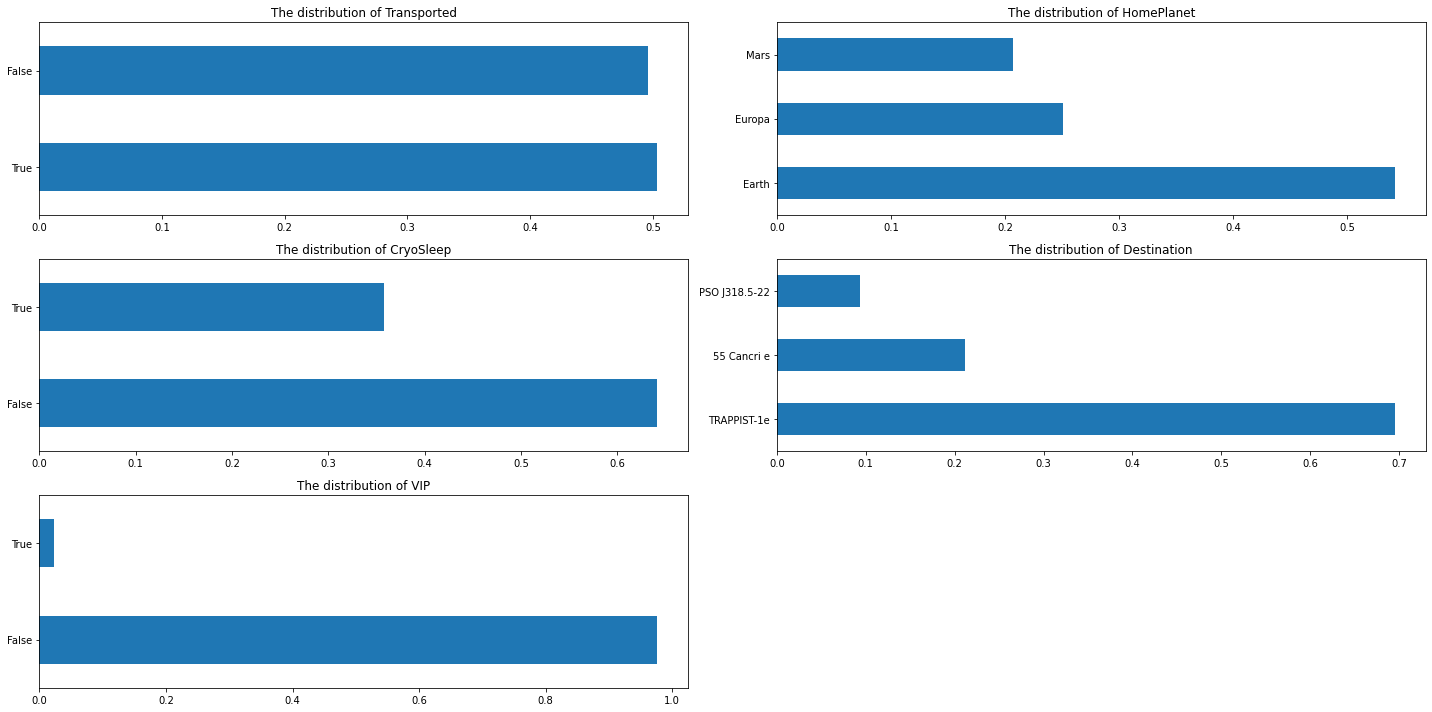

In [17]:
fig = plt.figure(figsize=(20, 10))
rows = 3
cols = 2

for i in range(rows*cols-1):
  fig.add_subplot(rows, cols, i+1)
  #sns.countplot(y=cat_cols[i], data=train_df)
  train_df[cat_cols[i]].value_counts(normalize=True).plot(kind='barh')
  plt.title(f"The distribution of {cat_cols[i]}")

fig.tight_layout()
plt.show();

* The feature that we are trying to predict, `Transported`, is almost balanced, meaning that the number of passengers who were transported to an alternate dimension and that of those who were not are approximately the same.
* Earth is the planet which more than half of the passengers departed from followed by Europa and Mars.
* The number of passengers who were elected to be put into suspended animation in their cabins for the duration of the voyage was more than 60 percent of the total passengers.
* TRAPPIST-1e is the planet where most of the passenger were going to be debarking.
* Most of the passenger did not pay for special VIP service during the voyage.

## 2.3 Ambiguous features

In this bucket, we have `PassengerId`, `Cabin`, and `Name`.

According to the description Kaggle provides, `PassengerId` represents a unique Id for each passenger. Each Id takes the form `gggg_pp` where `gggg` indicates a group the passenger is travelling with and `pp` is their number within the group. People in a group are often family members, but not always. Then, we can create a new feature called `PassengerGroup` by extracting the first four characters from `PassengerId`.


`Cabin` is the cabin number where the passenger is staying. Takes the form `deck/num/side`, where `side` can be either `P` for *Port* or `S` for *Starboard*. As in the previous case, it is possible to create two new features out of this features, each representing the deck, and side, respectively. 


Finally, in terms of `Name` (the first and last names of the passenger), we will not pay much attention to this feature to make a prediction because we do not think the name of a passenger would have influenced his/her chance of transporation.

### 2.3.1 `PassengerId`

In [18]:
train_df['PassengerGroup'] = train_df['PassengerId'].str.split('_').str[0]
test_df['PassengerGroup'] = test_df['PassengerId'].str.split('_').str[0]

train_df.drop('PassengerId', axis=1, inplace=True)
test_df.drop('PassengerId', axis=1, inplace=True)

print(f"There are {train_df['PassengerGroup'].nunique()} different groups.")
print(f"There are {test_df['PassengerGroup'].nunique()} different groups.")

There are 6217 different groups.
There are 3063 different groups.


We have created a feature called `PassengerGroup` from `PassengerId` which represents the group the passengers were travelling with. 

### 2.3.2 `Cabin`

In [19]:
train_df['CabinDeck'] = train_df['Cabin'].str.split('/').str[0]
train_df['CabinSide'] = train_df['Cabin'].str.split('/').str[2]

test_df['CabinDeck'] = test_df['Cabin'].str.split('/').str[0]
test_df['CabinSide'] = test_df['Cabin'].str.split('/').str[2]

train_df.drop('Cabin', axis=1, inplace=True)
test_df.drop('Cabin', axis=1, inplace=True)

In [20]:
train_df.loc[:, ['CabinDeck', 'CabinSide']].head()

,CabinDeck,CabinSide
0,B,P
1,F,S
2,A,S
3,A,S
4,F,S


In [21]:
print(f"There are {train_df['CabinDeck'].nunique()} different cabin decks.")
print(f"There are {train_df['CabinSide'].nunique()} different cabin sides.")

There are 8 different cabin decks.
There are 2 different cabin sides.


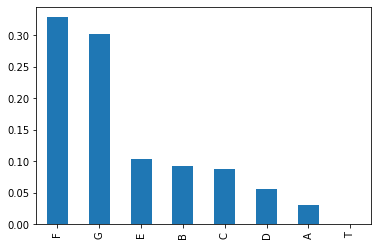

In [22]:
train_df['CabinDeck'].value_counts(normalize=True).plot(kind='bar')

* Decks 'F' and 'G' were occupied by more than 60% of the passengers.
* Cabin deck 'T' had the fewest passengers.

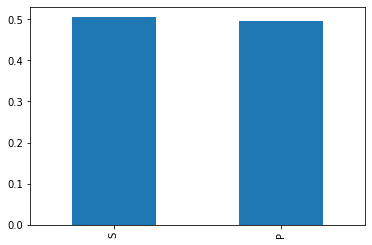

In [23]:
train_df['CabinSide'].value_counts(normalize=True).plot(kind='bar');

This feature `CabinSide` is balanced.


### 2.3.3 `Name`

We are going to create a new column `LastName` from `Name` by extracting only the last name of the passengers.

In [24]:
train_df['Name']

0         Maham Ofracculy
1            Juanna Vines
2           Altark Susent
3            Solam Susent
4       Willy Santantines
              ...        
8688    Gravior Noxnuther
8689      Kurta Mondalley
8690         Fayey Connon
8691     Celeon Hontichre
8692     Propsh Hontichre
Name: Name, Length: 8693, dtype: object

In [25]:
train_df['LastName'] = train_df['Name'].str.split(' ').str[-1]
test_df['LastName'] = test_df['Name'].str.split(' ').str[-1]

train_df.loc[:, ['Name', 'LastName']].head()

,Name,LastName
0,Maham Ofracculy,Ofracculy
1,Juanna Vines,Vines
2,Altark Susent,Susent
3,Solam Susent,Susent
4,Willy Santantines,Santantines


Now let's check whether the passengers who share the same last name belong to the same passenger group.

In [26]:
train_df.groupby('LastName')['PassengerGroup'].nunique()

LastName
Acobson        2
Acobsond       3
Adavisons      5
Adkinson       3
Admingried     1
              ..
Wynneyerson    2
Yanton         5
Yatters        2
Yorkland       7
Youngrayes     3
Name: PassengerGroup, Length: 2217, dtype: int64

It can be seen that even if some passengers have the same last name, they are not in the same passenger group.

In [27]:
train_df.groupby('PassengerGroup')['LastName'].nunique()

PassengerGroup
0001    1
0002    1
0003    1
0004    1
0005    1
       ..
9275    1
9276    1
9278    1
9279    1
9280    1
Name: LastName, Length: 6217, dtype: int64

In [28]:
sum(train_df.groupby('PassengerGroup')['LastName'].nunique() != 1)

353

Likewise, the passengers in a group might not have the same last name.

# 3. Data Exploration - Bivariate

Until now, we analyzed all features individually. Let's now start combining some of these features together to obtain further insight into the interactions between them.

* Continuous vs. Continuous
* Continuous vs. Categorical
* Categorical vs. Categorical

## 3.1 Continuous features

In [29]:
train_df.loc[:, num_cols].corr()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
Age,1.000000,0.068723,0.130421,0.033133,0.123970,0.101007
RoomService,0.068723,1.000000,-0.015889,0.054480,0.010080,-0.019581
FoodCourt,0.130421,-0.015889,1.000000,-0.014228,0.221891,0.227995
ShoppingMall,0.033133,0.054480,-0.014228,1.000000,0.013879,-0.007322
Spa,0.123970,0.010080,0.221891,0.013879,1.000000,0.153821
VRDeck,0.101007,-0.019581,0.227995,-0.007322,0.153821,1.000000


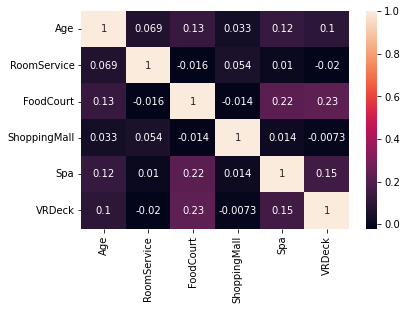

In [30]:
sns.heatmap(train_df.loc[:, num_cols].corr(), annot=True)
plt.show();

In this dataset, we do not see any strong correlation between any two continuous variables.

The scatter plots between `Age` and the luxury features are shown below.

In [31]:
# define the features related to the luxury amenities of Spaceship Titanic
luxury = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

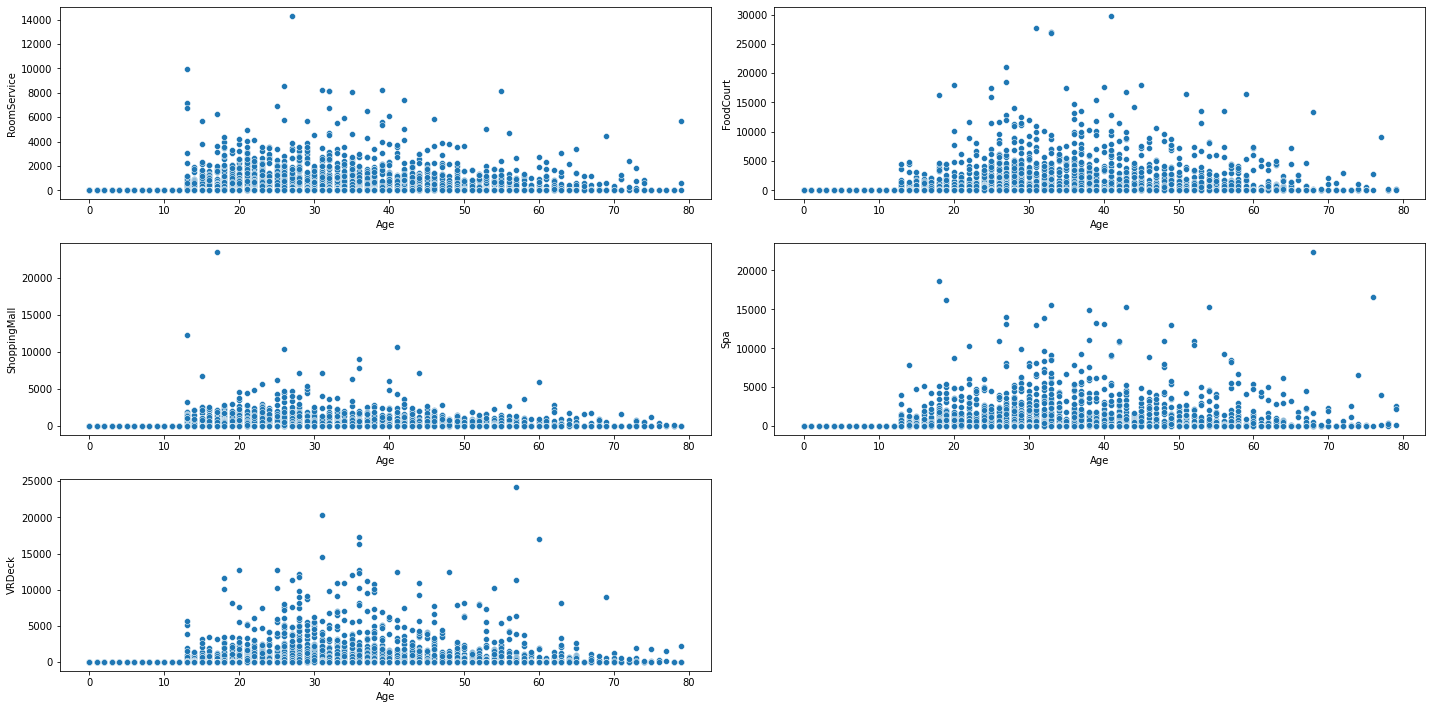

In [32]:
fig = plt.figure(figsize=(20, 10))
rows = 3
cols = 2

for i in range(rows*cols-1):
  fig.add_subplot(rows, cols, i+1)
  sns.scatterplot(data=train_df, x='Age', y=luxury[i]);

fig.tight_layout()
plt.show();

The points in the above scatter plots do not follow any specific pattern.

Note that the passengers those who are under 13 do not have any bill on the luxury amenities. This seems logicial as they would have been accompanied by their parents.

In [33]:
# the sum of spending on the luxury amenities of the passengers under 13
train_df.loc[train_df['Age'] < 13, ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=0)

RoomService     0.0
FoodCourt       0.0
ShoppingMall    0.0
Spa             0.0
VRDeck          0.0
dtype: float64

We confirm that the passengers under the age of 13 had no expenditure on the luxury amenities.

In [34]:
# the number of missing values in the luxury amenities of the passengers under 13
train_df.loc[train_df['Age'] < 13, ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].isna().sum()

RoomService     20
FoodCourt       12
ShoppingMall    20
Spa             14
VRDeck          24
dtype: int64

We may be able to fill in the missing values for the luxury amenities that passengers under the age of 13 with zero.

In [35]:
# fill in missing values
train_df.loc[train_df['Age'] < 13, ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = train_df.loc[train_df['Age'] < 13, ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].fillna(0)
test_df.loc[test_df['Age'] < 13, ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = test_df.loc[test_df['Age'] < 13, ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].fillna(0)

train_df.loc[train_df['Age'] < 13, ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].isna().sum()

RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

Now let's look at the age distribution of passengers who did not spend money on luxury amenities.

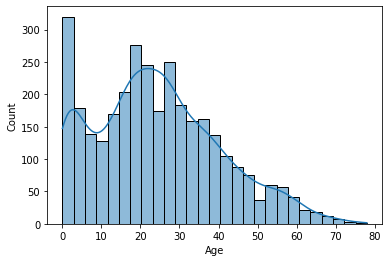

In [36]:
luxury_zero = (train_df['RoomService'] == 0) & (train_df['ShoppingMall'] == 0) & (train_df['FoodCourt'] == 0) & (train_df['Spa'] == 0) & (train_df['VRDeck'] == 0)
sns.histplot(data=train_df.loc[luxury_zero], x='Age', kde=True)
plt.show();

It can be seen that the distribution is not restricted between the ages of 0 and 13 years.

## 3.2 Categorical vs. Continuous features

Now we will try to see how values of continuous variables behave for different values of categorical variables.

In [37]:
#cat_cols.remove('Transported')
cat_cols.extend(['PassengerGroup', 'CabinDeck', 'CabinSide'])
cat_cols

['Transported',
 'HomePlanet',
 'CryoSleep',
 'Destination',
 'VIP',
 'PassengerGroup',
 'CabinDeck',
 'CabinSide']

### 3.2.1 `Transported`
We will first see the relationship between `Transported` column and the continuous variables.

In [38]:
train_df.groupby('Transported').agg('mean')[num_cols]

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
Transported,,,,,,
False,29.922858,388.528994,382.525520,167.407574,563.982016,542.474256
True,27.748834,62.922220,531.326107,179.157710,61.517683,68.906636


In the above table, we can see that in general the avarage bills spent on the luxury amenities of the passengers who did not get transported to the alternate dimension are more than those who did.

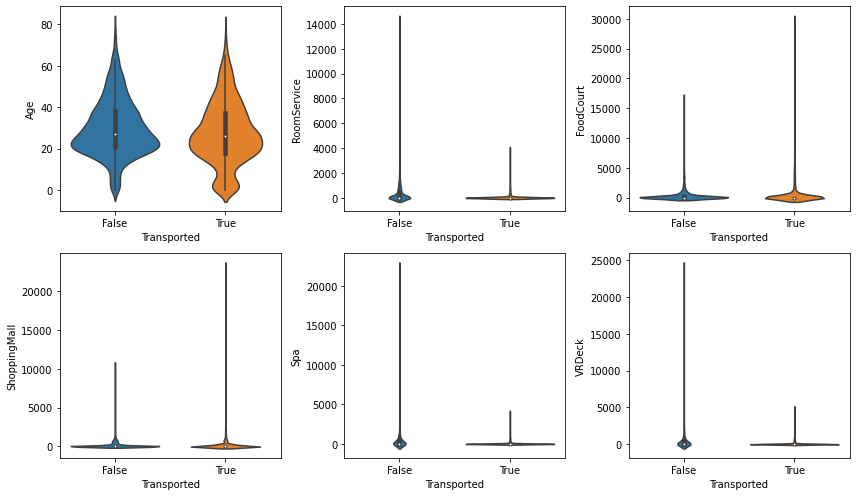

In [39]:
fig = plt.figure(figsize=(12, 7))
nrows = 2
ncols = 3

for i in range(nrows*ncols):
  fig.add_subplot(nrows, ncols, i+1)
  sns.violinplot(data=train_df, x='Transported', y=num_cols[i])

fig.tight_layout()
plt.show();

The box plots above indicates that...
* the distributions of `Age` column grouped by the target variable, `Transported` look similar.

### 3.2.2 `HomePlanet`

In [40]:
train_df.groupby('HomePlanet').agg('mean')[num_cols]

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
HomePlanet,,,,,,
Earth,26.068232,136.485157,137.137533,133.456483,142.496897,137.581504
Europa,34.419664,145.162691,1501.053161,151.060125,847.649257,874.096282
Mars,29.297203,551.616676,54.173133,307.731326,109.966416,47.385598


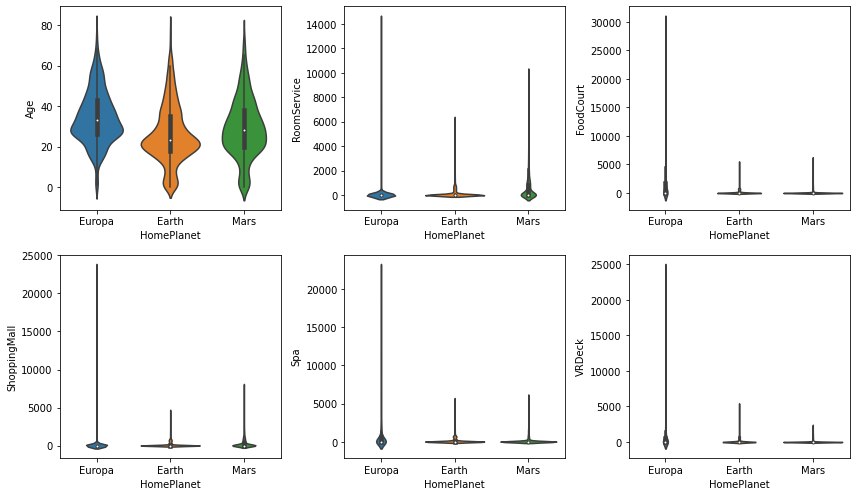

In [41]:
fig = plt.figure(figsize=(12, 7))
nrows = 2
ncols = 3

for i in range(nrows*ncols):
  fig.add_subplot(nrows, ncols, i+1)
  sns.violinplot(data=train_df, x='HomePlanet', y=num_cols[i])

fig.tight_layout()
plt.show();

* The passengers from Europa are on average older than those who from Earth and Mars. 
* Furthermore, they tend to spend more on average on the luxury amenities except `RoomService` and `ShoppingMall`.
  * On average, the passengers from Europa have billed more at the luxury amenities than those who departed from the other two planets. This may be due to a higher average age of people from Europa and these people may have more to spare. However, we have seen that the correlations between `Age` and the luxury services were lower than 0.2, which can be considered as negligible.

### 3.2.3 `CryoSleep`

In [42]:
train_df.groupby('CryoSleep').agg('mean')[num_cols]

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
CryoSleep,,,,,,
False,29.651319,349.752906,712.202437,270.181359,485.819291,474.28973
True,27.405415,0.000000,0.000000,0.000000,0.000000,0.00000


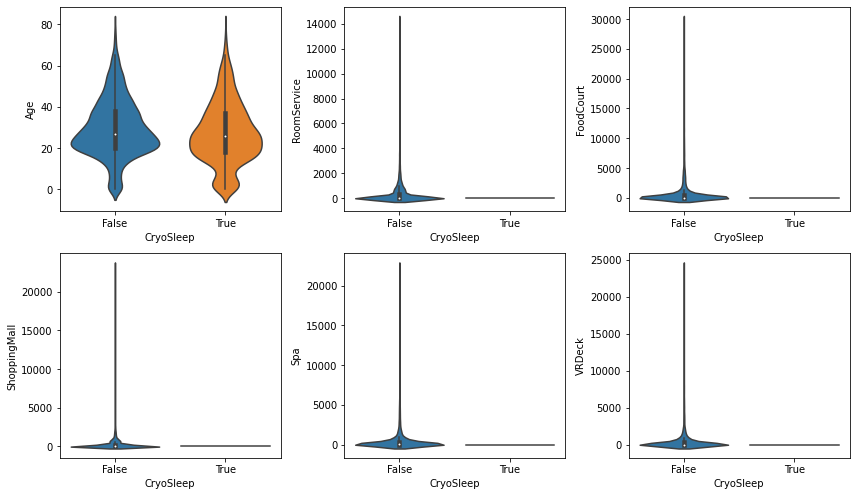

In [43]:
fig = plt.figure(figsize=(12, 7))
nrows = 2
ncols = 3

for i in range(nrows*ncols):
  fig.add_subplot(nrows, ncols, i+1)
  sns.violinplot(data=train_df, x='CryoSleep', y=num_cols[i])

fig.tight_layout()
plt.show();

* The passengers in cryosleep have zero spending on the luxury amentieis, which is a matter of course. We can use this information to fill in the missing values in those columns.

In [44]:
# For those of you who have been to cryosleep, find out how much missing value there is in luxury amenities.
train_df.loc[train_df['CryoSleep'] == True, ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].isna().sum()

RoomService     54
FoodCourt       65
ShoppingMall    85
Spa             55
VRDeck          57
dtype: int64

In [45]:
train_df.loc[train_df['CryoSleep'] == True, ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = train_df.loc[train_df['CryoSleep'] == True, ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].fillna(0)
test_df.loc[test_df['CryoSleep'] == True, ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = test_df.loc[test_df['CryoSleep'] == True, ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].fillna(0)

train_df.loc[train_df['CryoSleep'] == True, ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].isna().sum()

RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

How about the other way around? Were passengers who didn't spend any money on luxury amenities in cold sleep?

In [46]:
train_df.loc[luxury_zero, 'CryoSleep'].value_counts()

True     2734
False     507
Name: CryoSleep, dtype: int64

It turns out to be no, there were people not in cryosleep who used none of the luxury amenities.

### 3.2.4 `Destination`

In [47]:
train_df.groupby('Destination').agg('mean')[num_cols]

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
Destination,,,,,,
55 Cancri e,29.305776,191.306443,879.610112,155.569257,474.734007,503.124789
PSO J318.5-22,27.529412,89.219822,121.100381,111.705957,117.100509,139.598475
TRAPPIST-1e,28.817522,250.955940,372.634372,185.314457,281.936728,265.132214


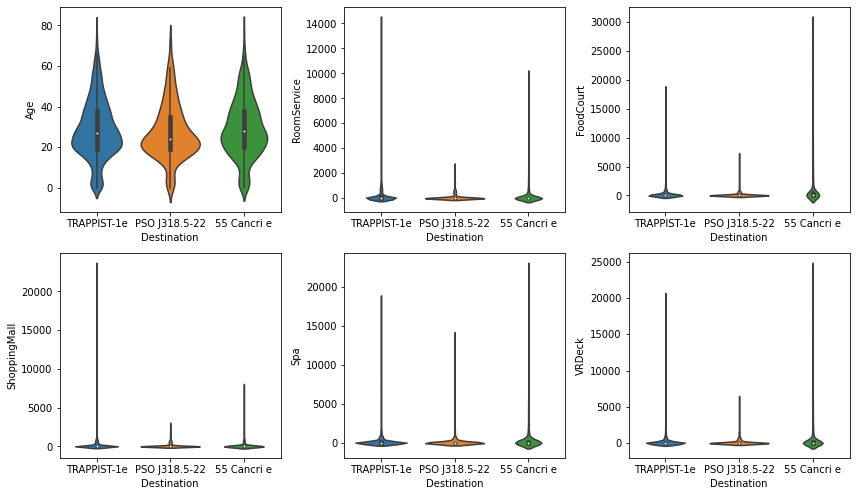

In [48]:
fig = plt.figure(figsize=(12, 7))
nrows = 2
ncols = 3

for i in range(nrows*ncols):
  fig.add_subplot(nrows, ncols, i+1)
  sns.violinplot(data=train_df, x='Destination', y=num_cols[i])

fig.tight_layout()
plt.show();

* Nothing unusual is seen between `Age` and `Destination`.
* In general, the passengers whose destination was PSO J318.5-22 were likely to spend less on the luxury services.

### 3.2.5 `VIP`

In [49]:
train_df.groupby('VIP')[num_cols].agg('mean')

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
VIP,,,,,,
False,28.639611,215.308913,422.485352,171.669961,299.239516,279.989984
True,37.449495,473.615385,1802.056701,247.726804,756.868687,1228.556122


* The average age of passengers who paid for special VIP services during the voyage was about nine years higher than those who did not.
* They also spent more on the luxury amenities, which makes sense. 

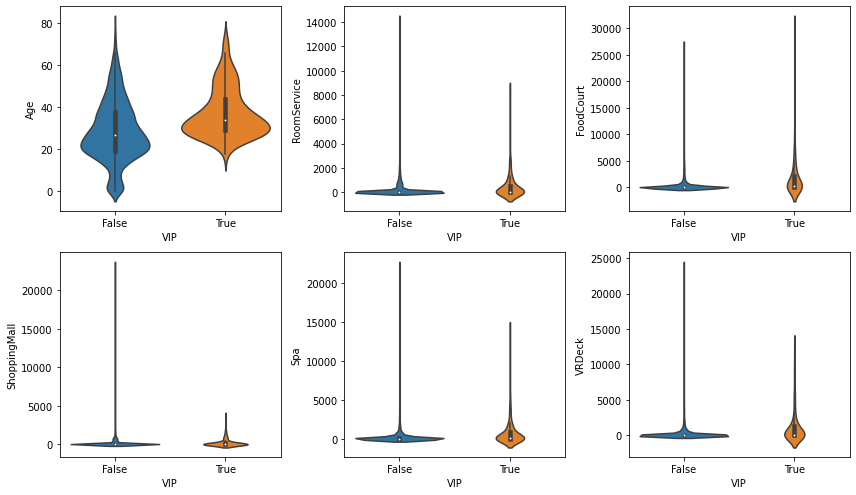

In [50]:
fig = plt.figure(figsize=(12, 7))
nrows = 2
ncols = 3

for i in range(nrows*ncols):
  fig.add_subplot(nrows, ncols, i+1)
  sns.violinplot(data=train_df, x='VIP', y=num_cols[i])

fig.tight_layout()
plt.show();

In [51]:
train_df.groupby('VIP')['Age'].agg('min')

VIP
False     0.0
True     18.0
Name: Age, dtype: float64

Passengers under the age of 18 do not appear to have paid for VIP services because they probably couldn't have afforded it. This will help fill in the missing values.

In [52]:
train_df.loc[train_df['Age'] < 18, 'VIP'].isna().sum()

45

There are 45 missing observations in feature `VIP` for passengers under the age of 18.

In [53]:
train_df.loc[train_df['Age'] < 18, 'VIP'] = train_df.loc[train_df['Age'] < 18, 'VIP'].fillna(False)
test_df.loc[test_df['Age'] < 18, 'VIP'] = test_df.loc[test_df['Age'] < 18, 'VIP'].fillna(False)

### 3.2.6 `CabinDeck`

In [54]:
train_df.groupby('CabinDeck')[num_cols].agg('mean')

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
CabinDeck,,,,,,
A,35.161943,134.616601,1541.539062,113.156627,693.250000,931.692913
B,33.622715,84.474227,1243.344072,150.435233,720.946891,743.485199
C,34.886145,179.943166,1815.339674,172.960811,916.425474,1074.060893
D,33.518201,672.684435,587.731501,309.360169,470.677350,286.404255
E,30.068925,310.952546,265.792388,229.158382,270.378347,240.906250
F,28.430495,307.356025,144.948634,238.288679,164.073117,145.164843
G,24.062775,72.087539,78.878010,69.549174,88.785320,75.100827
T,37.000000,427.200000,1397.400000,0.500000,2008.400000,883.000000


* Passengers in cabin deck 'G' were on average younger. They also spent the least money on the luxury amenities.

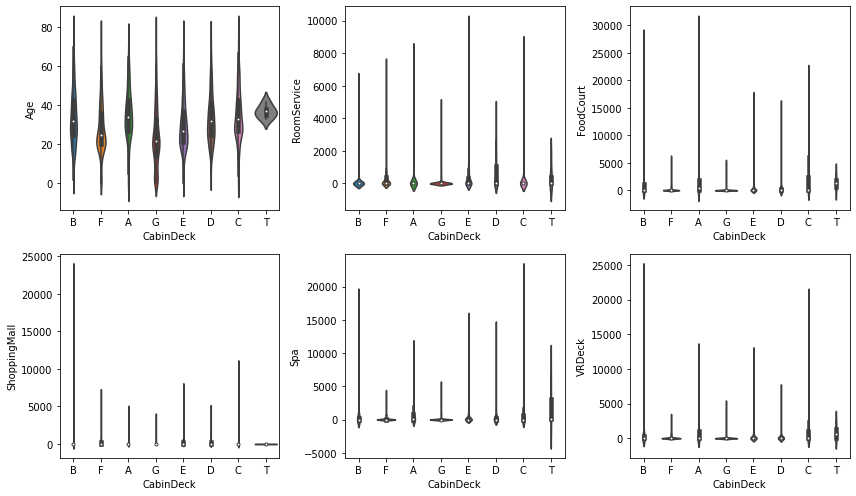

In [55]:
fig = plt.figure(figsize=(12, 7))
nrows = 2
ncols = 3

for i in range(nrows*ncols):
  fig.add_subplot(nrows, ncols, i+1)
  sns.violinplot(data=train_df, x='CabinDeck', y=num_cols[i])

fig.tight_layout()
plt.show();

### 3.2.7 `CabinSide`

In [56]:
train_df.groupby('CabinSide')[num_cols].agg('mean')

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
CabinSide,,,,,,
P,28.650339,228.086610,421.102046,185.057377,301.982892,312.926060
S,28.987604,212.200283,486.068933,160.334669,306.246514,293.697735


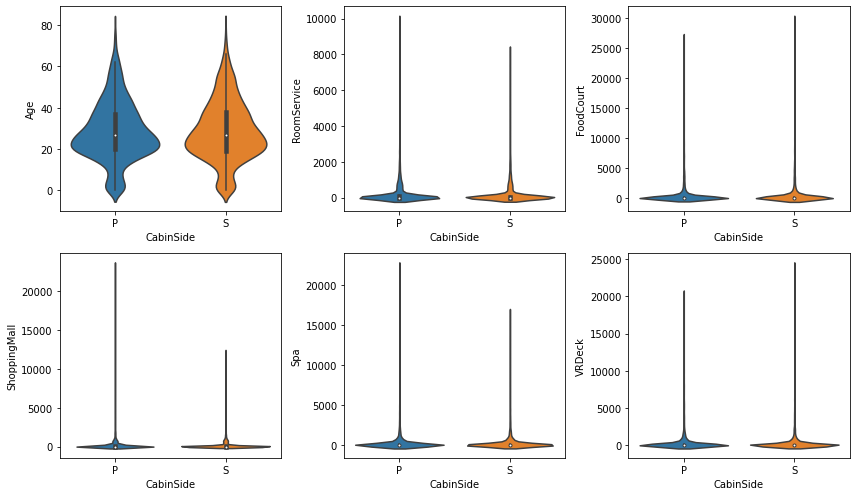

In [57]:
fig = plt.figure(figsize=(12, 7))
nrows = 2
ncols = 3

for i in range(nrows*ncols):
  fig.add_subplot(nrows, ncols, i+1)
  sns.violinplot(data=train_df, x='CabinSide', y=num_cols[i])

fig.tight_layout()
plt.show();

We do not observe any relationships between `CabinSide` and the continuous variables.

## 3.3 Categorical vs. Categorical features

Lastly, we will see whether there exists a relationship between two categorical variables. We first drop `PassengerGroup` as it has too many categories to look into.

In [58]:
cat_cols.remove('PassengerGroup')
cat_cols

['Transported',
 'HomePlanet',
 'CryoSleep',
 'Destination',
 'VIP',
 'CabinDeck',
 'CabinSide']

### 3.3.1 `Transported`

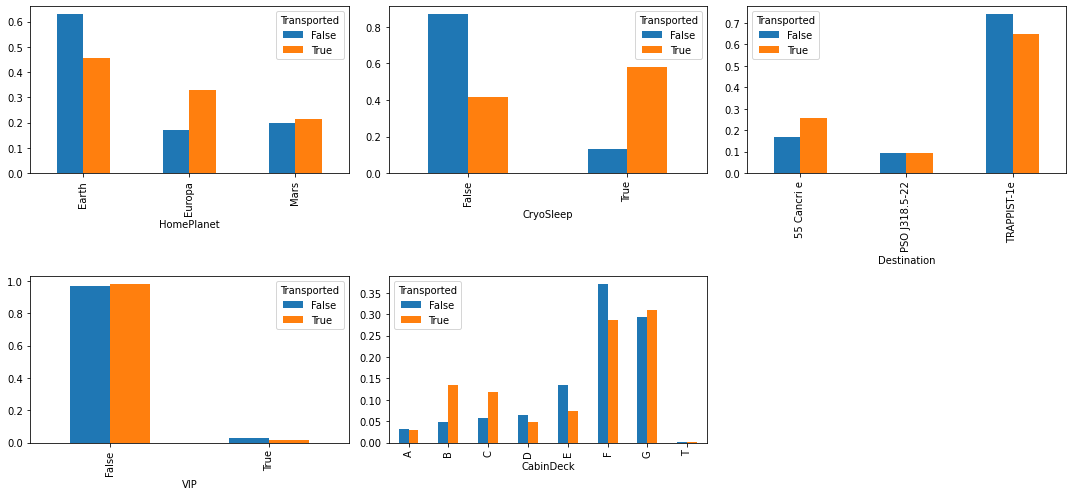

In [59]:
cat_cols_no_transported = cat_cols[:]
cat_cols_no_transported.remove('Transported')

nrows = 2
ncols = 3
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 7))
fig.delaxes(axes[nrows-1, ncols-1])

for i in range(nrows*ncols-1):
  if i < 3:
    x, y = 0, i
  else:
    x, y = 1, i-3
  train_df.groupby('Transported')[cat_cols_no_transported[i]].value_counts(normalize=True).unstack(0).plot(ax=axes[x, y], kind='bar')
  #train_df.groupby(cat_cols[i])['Transported'].value_counts(normalize=True).unstack(0).plot(ax=axes[x, y], kind='bar')

fig.tight_layout()
plt.show();

* By looking at the above plots, it seems that `Destination`, `VIP`, `CabinDeck`, `CabinSide`, and `Age_bin` are not considered to be very useful to predict `Transported`.
* The passengers who got transported were more likely to be in cryosleep.

### 3.3.2 `HomePlanet`

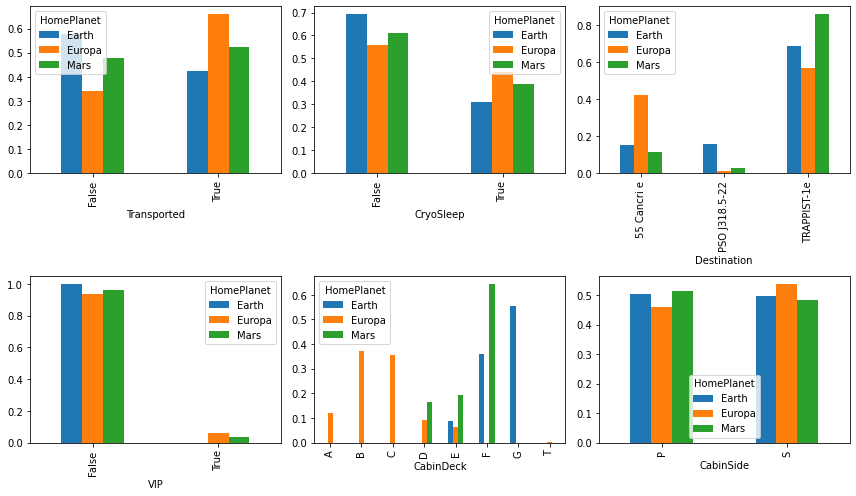

In [60]:
cat_cols_no_homeplanet = cat_cols[:]
cat_cols_no_homeplanet.remove('HomePlanet')

nrows = 2
ncols = 3
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 7))

for i in range(nrows*ncols):
  if i < 3:
    x, y = 0, i
  else:
    x, y = 1, i-3
  train_df.groupby('HomePlanet')[cat_cols_no_homeplanet[i]].value_counts(normalize=True).unstack(0).plot(ax=axes[x, y], kind='bar')

fig.tight_layout()
plt.show();

* PSO J318.5-22 was not a popular destination for people coming from Europa and Mars.
* Most of the passengers staying in cabin decks 'A', 'B', 'C', and 'T' were from Europa while people in deck 'D' were coming from Mars and 'Europa'. 
   - Would staying in the decks 'A', 'B', and 'C' have been more expensive than the other decks? We would never know as we do not have any information about ticket price.
* Passengers in cabin deck 'G' were mostly from Earth and in decks 'E' and 'F' either from Earth or Mars.
* No relationship seems to exist between `HomePlanet` and `CabinSide`
* Likewise, we do not see any particular pattern between `HomePlanet` and `CryoSleep`.
* The same is true for between `HomePlanet` and `VIP`.

### 3.3.3 `CryoSleep`

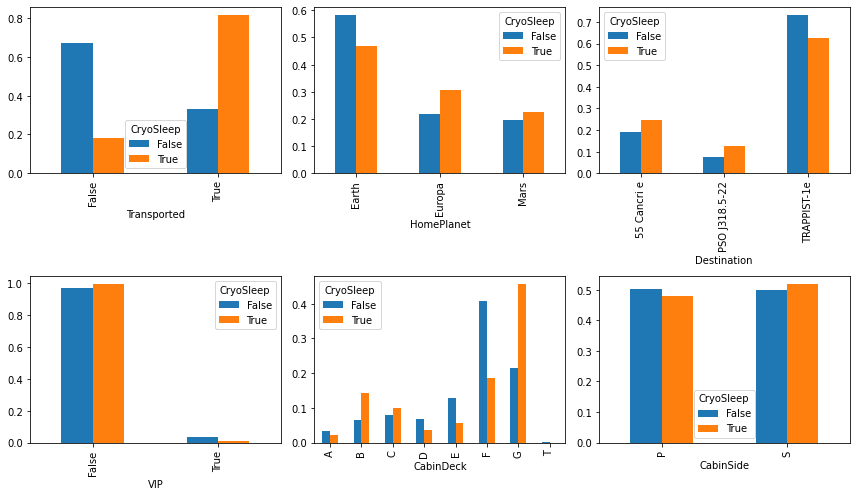

In [61]:
cat_cols_no_cryosleep = cat_cols[:]
cat_cols_no_cryosleep.remove('CryoSleep')

nrows = 2
ncols = 3
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 7))

for i in range(nrows*ncols):
  if i < 3:
    x, y = 0, i
  else:
    x, y = 1, i-3
  train_df.groupby('CryoSleep')[cat_cols_no_cryosleep[i]].value_counts(normalize=True).unstack(0).plot(ax=axes[x, y], kind='bar')

fig.tight_layout()
plt.show();

* The passengers in cabin deck 'G' were likely to be put into cryosleep and the opposite is true for those who were staying in deck 'F'.

### 3.3.4 `Destination`

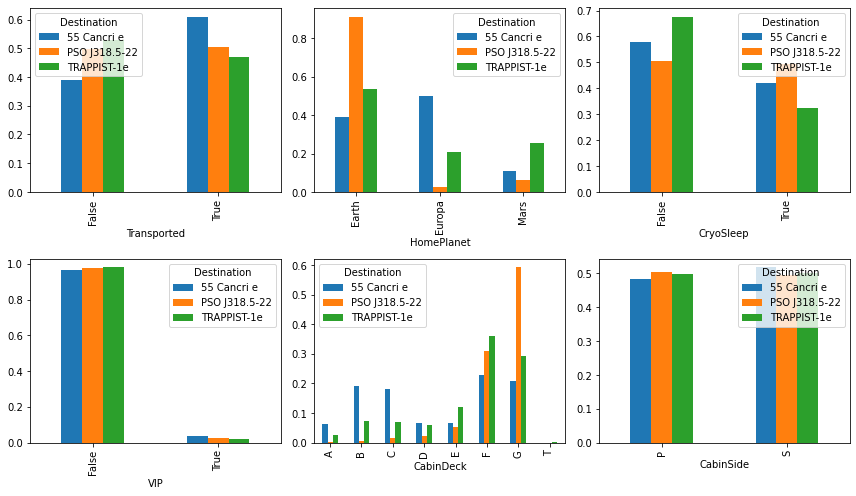

In [62]:
cat_cols_no_destination = cat_cols[:]
cat_cols_no_destination.remove('Destination')

nrows = 2
ncols = 3
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 7))

for i in range(nrows*ncols):
  if i < 3:
    x, y = 0, i
  else:
    x, y = 1, i-3
  train_df.groupby('Destination')[cat_cols_no_destination[i]].value_counts(normalize=True).unstack(0).plot(ax=axes[x, y], kind='bar')

fig.tight_layout()
plt.show();

* Most of the passengers from Earth were going to PSO J318.5-22.
* More than 90% of passengers destined for PSO J318.5-22 were staying in cabin G or F.
* `VIP`, `CryoSleep`, and `CabinSide` seem to have no special relationship with `Destination`.

### 3.3.5 `VIP`

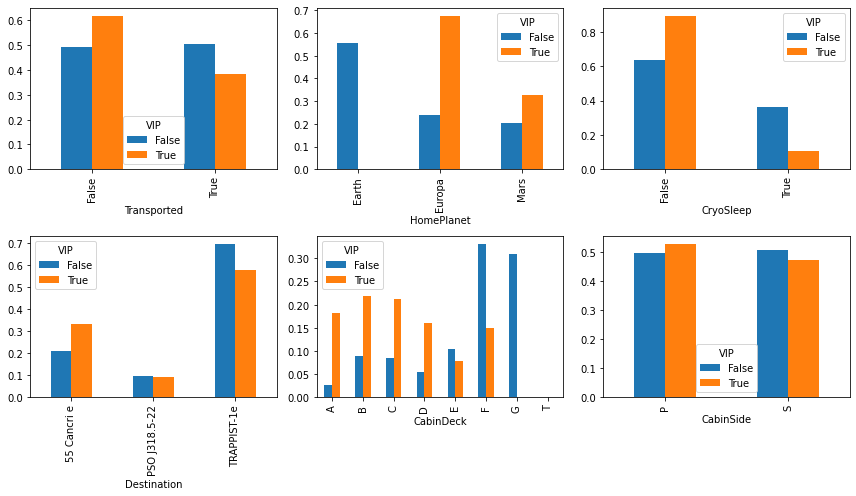

In [63]:
cat_cols_no_vip = cat_cols[:]
cat_cols_no_vip.remove('VIP')
nrows = 2
ncols = 3
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 7))

for i in range(nrows*ncols):
  if i < 3:
    x, y = 0, i
  else:
    x, y = 1, i-3
  train_df.groupby('VIP')[cat_cols_no_vip[i]].value_counts(normalize=True).unstack(0).plot(ax=axes[x, y], kind='bar')

fig.tight_layout()
plt.show();

* People from Europa were more likely to have paid for the VIP service.
 * Because of their age?
* No people from Earch paid for the VIP service.
* The passengers who did not pay for the VIP service tend to stay in cabin F or G.
  * We saw before that many passengers from Earth were staying in cabin F or G.
    * These cabins may be the cheapest.

# 4. Missingness

We will be using the missingno library to check out missing values in the data left to be filled in. It detects where `NaN` values (or no values) appear and highlights them. White lines indicate missing values.

Before that, we are going to drop some columns that seem unnecessary for imputation.

In [64]:
train_df.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name', 'Transported',
       'PassengerGroup', 'CabinDeck', 'CabinSide', 'LastName'],
      dtype='object')

In [65]:
train_df.drop(labels=['Name', 'LastName'], axis=1, inplace=True)

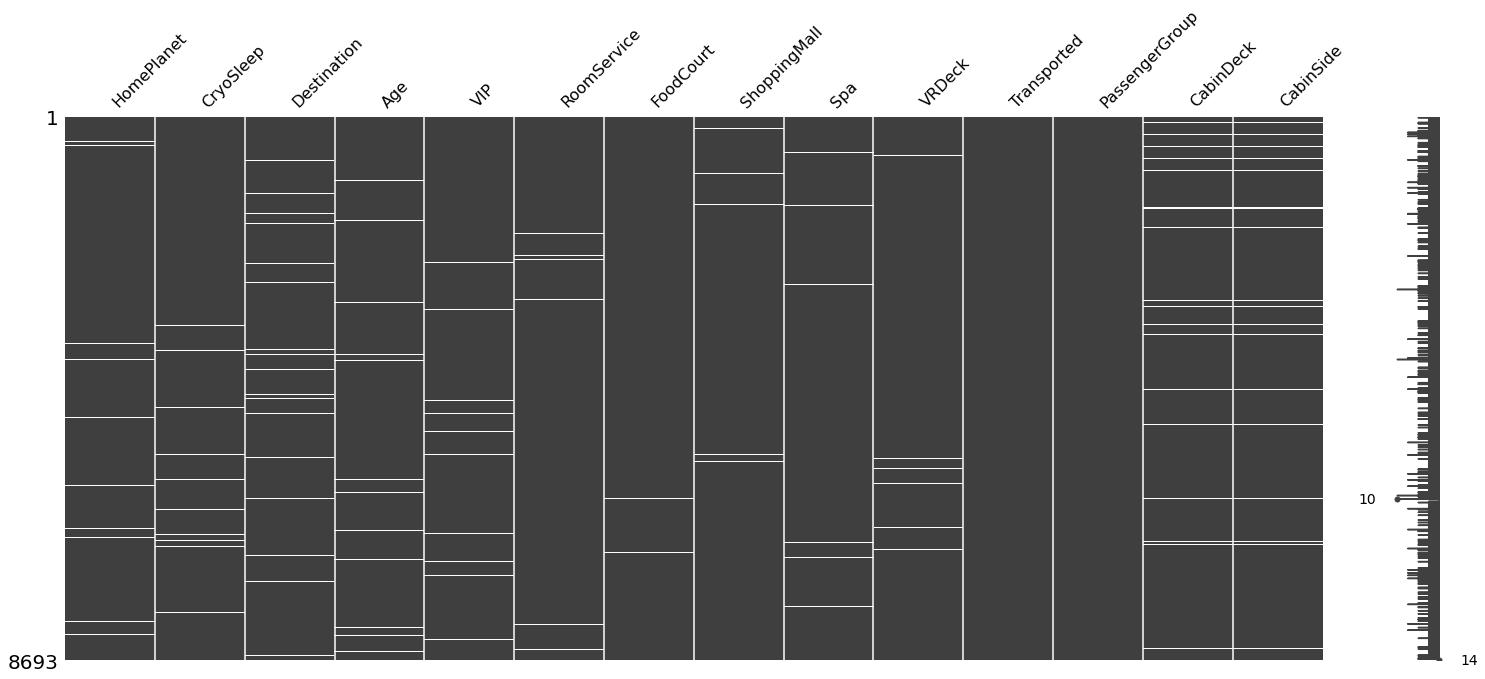

In [66]:
missingno.matrix(train_df)

In [67]:
train_df.isna().sum()

HomePlanet        201
CryoSleep         217
Destination       182
Age               179
VIP               158
RoomService       107
FoodCourt         106
ShoppingMall      103
Spa               114
VRDeck            107
Transported         0
PassengerGroup      0
CabinDeck         199
CabinSide         199
dtype: int64

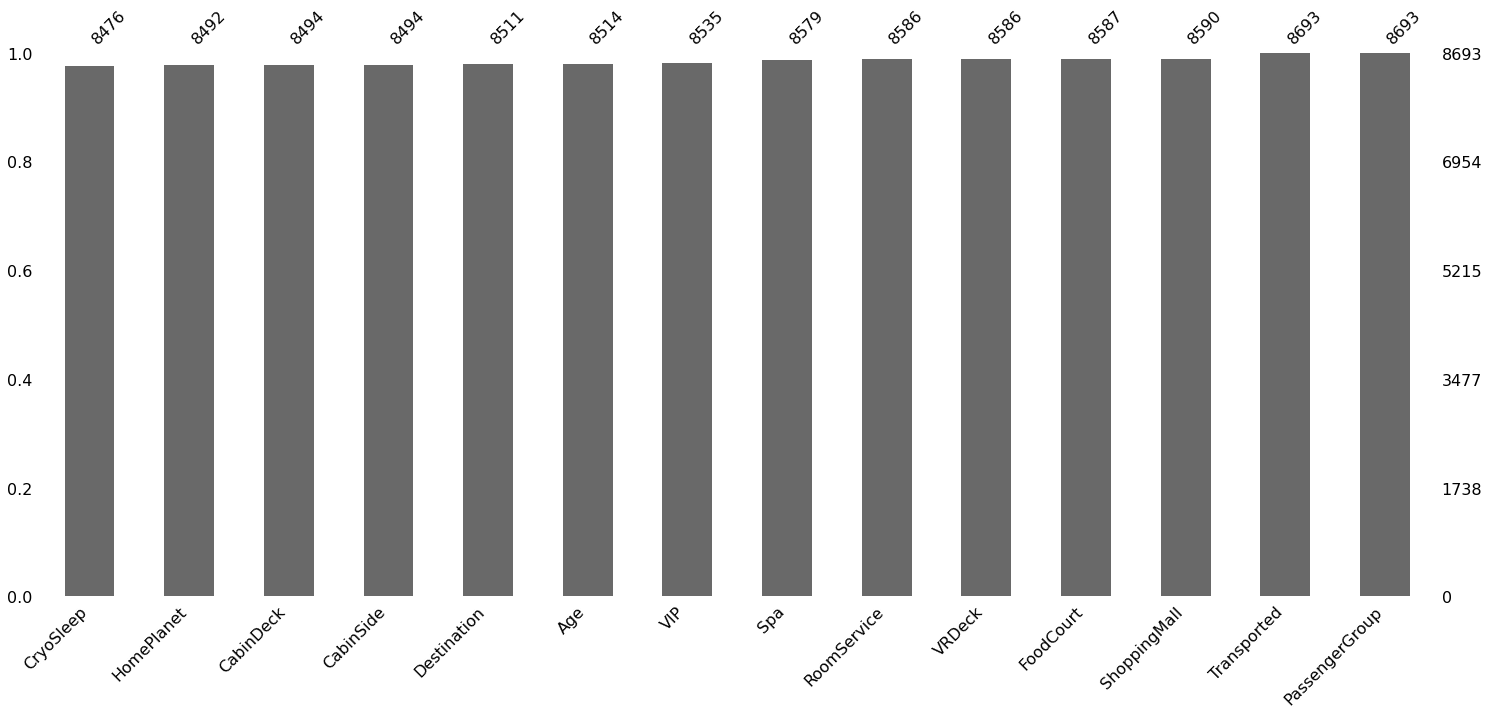

In [68]:
missingno.bar(train_df, sort='ascending')

All features except `PassengerGroup`, and `Transported` have a fair amount of missing values. 

To deal with the missingness, we will fill them with other values. For imputation, we will be using KNN ($K$-Nearest Neighbors), which is widely used.

One thing to note here is that the KNN Imputer does not recognize text data values. It will generate errors if we do not change these values to numerical values. Therefore, we first have to perform encoding to modify the categocial features in the data.

We are going to first change the data type of `PassengerGroup` to numeric.

In [69]:
train_df['PassengerGroup'] = pd.to_numeric(train_df['PassengerGroup'])
test_df['PassengerGroup'] = pd.to_numeric(test_df['PassengerGroup'])

In addition, we split the data into the features (X) and the target feature (y).

In [70]:
y = pd.Series(map(int, train_df['Transported']))
X = train_df.drop('Transported', axis=1)

Then, using `OrdinalEncoder()` from `sklearn.preprocessing` we will encode the columns.

In [71]:
enc = OrdinalEncoder()

X_to_encode = X.loc[:, ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'CabinDeck', 'CabinSide']]
X.loc[:, ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'CabinDeck', 'CabinSide']] = enc.fit_transform(X_to_encode)

Another point to keep in mind is that the KNN Imptuer is a distance-based imputation method. Thus, the data should be normalized because otherwise, the different scales of our data will lead the Imputer to produce biased replacements for the missing values. For simplicity, we will use Scikit-Learn's `MinMaxScaler` which will scale our variables to have values between 0 and 1.

In [72]:
scaler = MinMaxScaler()
X_scale = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
X_scale.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,PassengerGroup,CabinDeck,CabinSide
0,0.5,0.0,1.0,0.493671,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.0
1,0.0,0.0,1.0,0.303797,0.0,0.007608,0.000302,0.001064,0.024500,0.001823,0.000108,0.714286,1.0
2,0.5,0.0,1.0,0.734177,1.0,0.003001,0.119948,0.000000,0.299670,0.002030,0.000216,0.000000,1.0
3,0.5,0.0,1.0,0.417722,0.0,0.000000,0.043035,0.015793,0.148563,0.007997,0.000216,0.000000,1.0
4,0.0,0.0,1.0,0.202532,0.0,0.021149,0.002348,0.006428,0.025214,0.000083,0.000323,0.714286,1.0


Finally, we impute the data using `KNNImputer()`. The number of neighbors (`n_neighbors` argument) is set to 5 even if other values are also possible.

In [73]:
imputer = KNNImputer(n_neighbors=5)
X_imputed = pd.DataFrame(imputer.fit_transform(X_scale), columns = X_scale.columns)
X_imputed

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,PassengerGroup,CabinDeck,CabinSide
0,0.5,0.0,1.0,0.493671,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.0
1,0.0,0.0,1.0,0.303797,0.0,0.007608,0.000302,0.001064,0.024500,0.001823,0.000108,0.714286,1.0
2,0.5,0.0,1.0,0.734177,1.0,0.003001,0.119948,0.000000,0.299670,0.002030,0.000216,0.000000,1.0
3,0.5,0.0,1.0,0.417722,0.0,0.000000,0.043035,0.015793,0.148563,0.007997,0.000216,0.000000,1.0
4,0.0,0.0,1.0,0.202532,0.0,0.021149,0.002348,0.006428,0.025214,0.000083,0.000323,0.714286,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0.5,0.0,0.0,0.518987,1.0,0.000000,0.228726,0.000000,0.073322,0.003066,0.999569,0.000000,0.0
8689,0.0,1.0,0.5,0.227848,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.999784,0.857143,1.0
8690,0.0,0.0,1.0,0.329114,0.0,0.000000,0.000000,0.079687,0.000045,0.000000,0.999892,0.857143,1.0
8691,0.5,0.0,0.0,0.405063,0.0,0.000000,0.035186,0.000000,0.015753,0.134049,1.000000,0.571429,1.0


As you can see below, all the missing values are gone!

In [74]:
X_imputed.isna().sum()

HomePlanet        0
CryoSleep         0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
PassengerGroup    0
CabinDeck         0
CabinSide         0
dtype: int64

The changes we have been making so far also have
been applied to the test data. Then, we can impute the missing values present in the testing data.

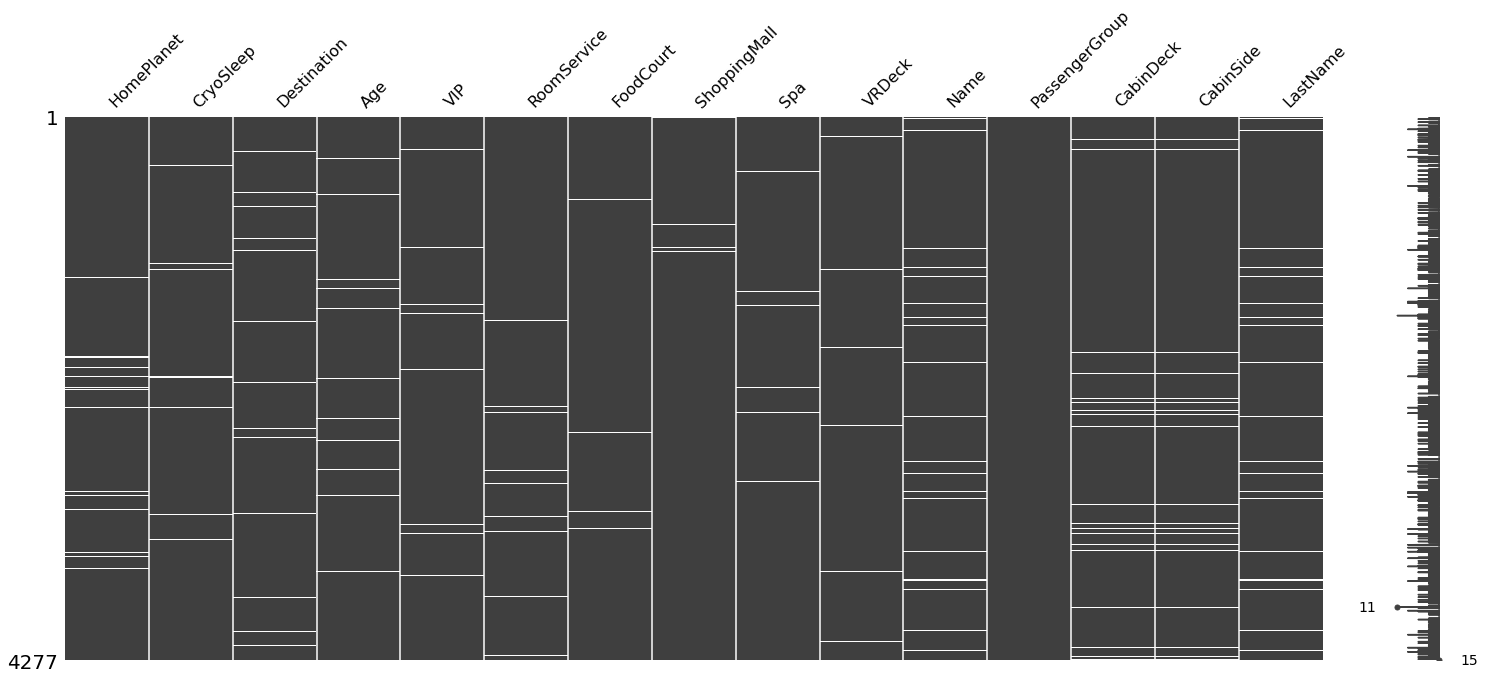

In [75]:
missingno.matrix(test_df)

In [76]:
# missingness in the test data
test_df.isna().sum()

HomePlanet         87
CryoSleep          93
Destination        92
Age                91
VIP                84
RoomService        55
FoodCourt          65
ShoppingMall       60
Spa                52
VRDeck             43
Name               94
PassengerGroup      0
CabinDeck         100
CabinSide         100
LastName           94
dtype: int64

In [77]:
# drop 'Name' and 'LastName' columns
test_df.drop(labels=['Name', 'LastName'], axis=1, inplace=True)
test_df.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'PassengerGroup',
       'CabinDeck', 'CabinSide'],
      dtype='object')

In [78]:
# encoding
test_df_to_encode = test_df.loc[:, ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'CabinDeck', 'CabinSide']]
test_df.loc[:, ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'CabinDeck', 'CabinSide']] = enc.transform(test_df_to_encode)

# scaler
test_df_scale = pd.DataFrame(scaler.transform(test_df), columns = test_df.columns)

# imputer
test_df_imputed = pd.DataFrame(imputer.transform(test_df_scale), columns = test_df.columns)

In [79]:
test_df_imputed.isna().sum()

HomePlanet        0
CryoSleep         0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
PassengerGroup    0
CabinDeck         0
CabinSide         0
dtype: int64

Now we are ready for modeling!

In [82]:
train_df_final = pd.concat([X_imputed, y], axis=1)

In [83]:
# save train_df_final and test_df_imputed
train_df_final.to_csv('train_df_clean.csv')
test_df_imputed.to_csv('test_df_clean.csv')